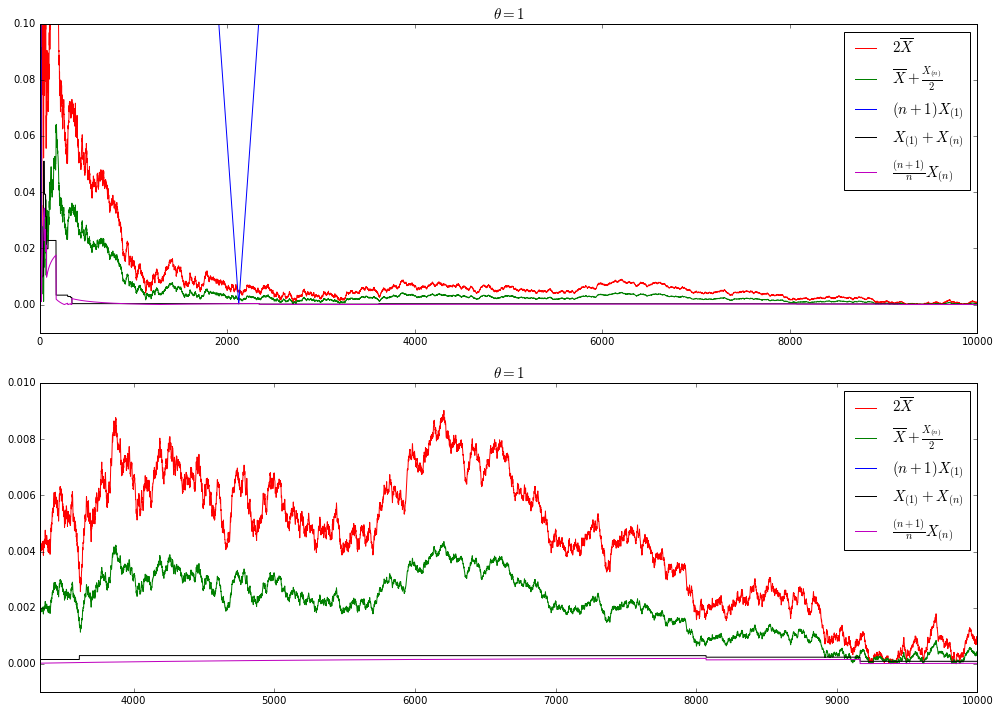

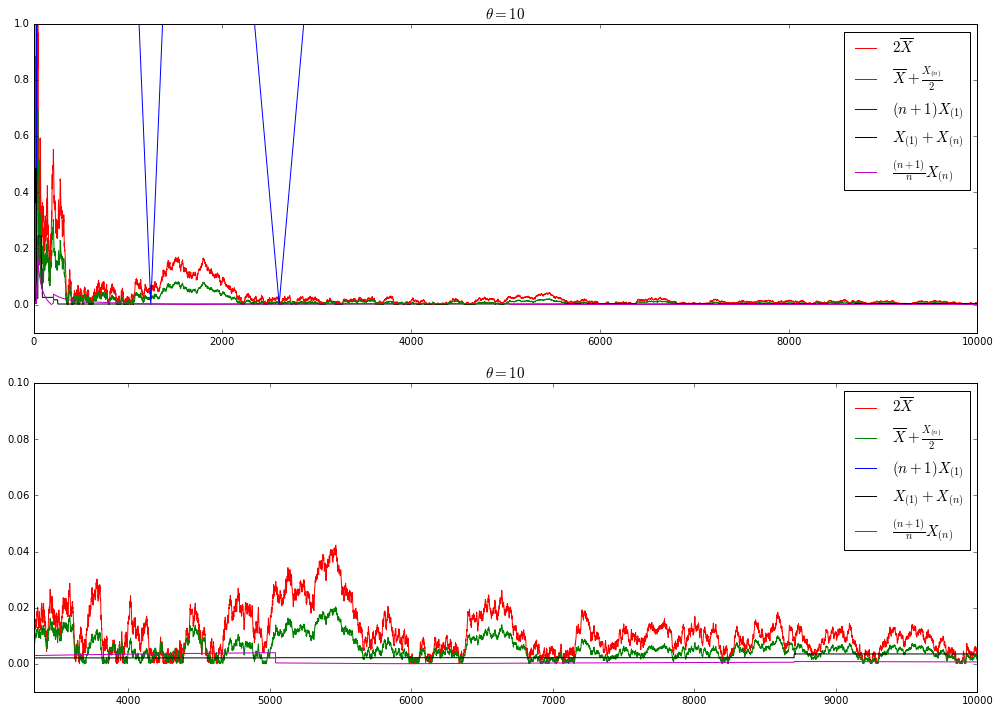

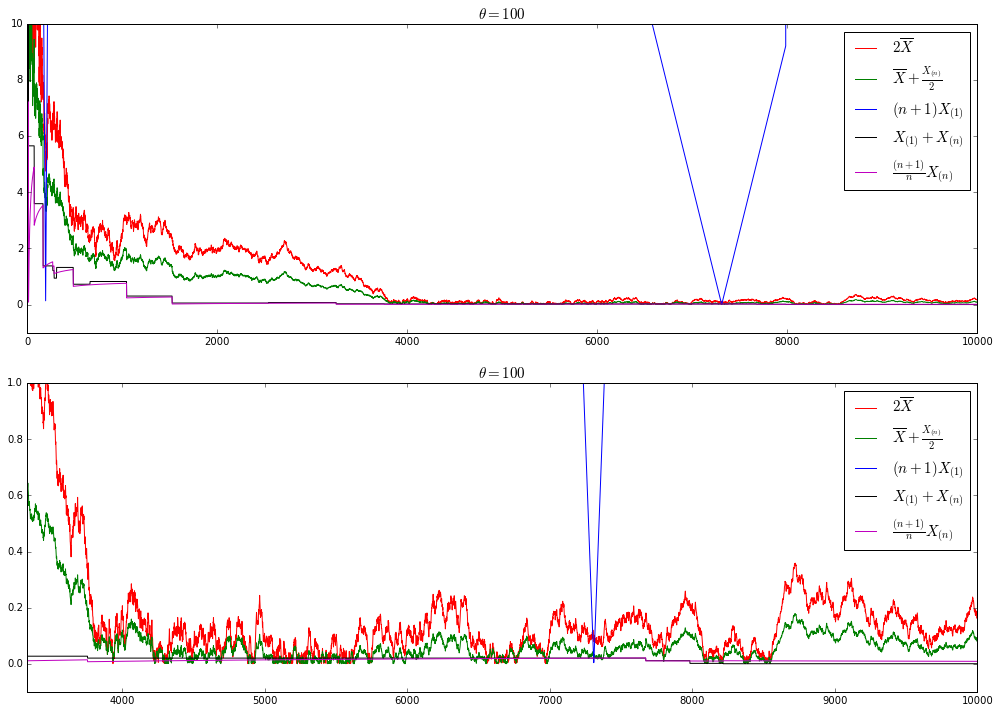

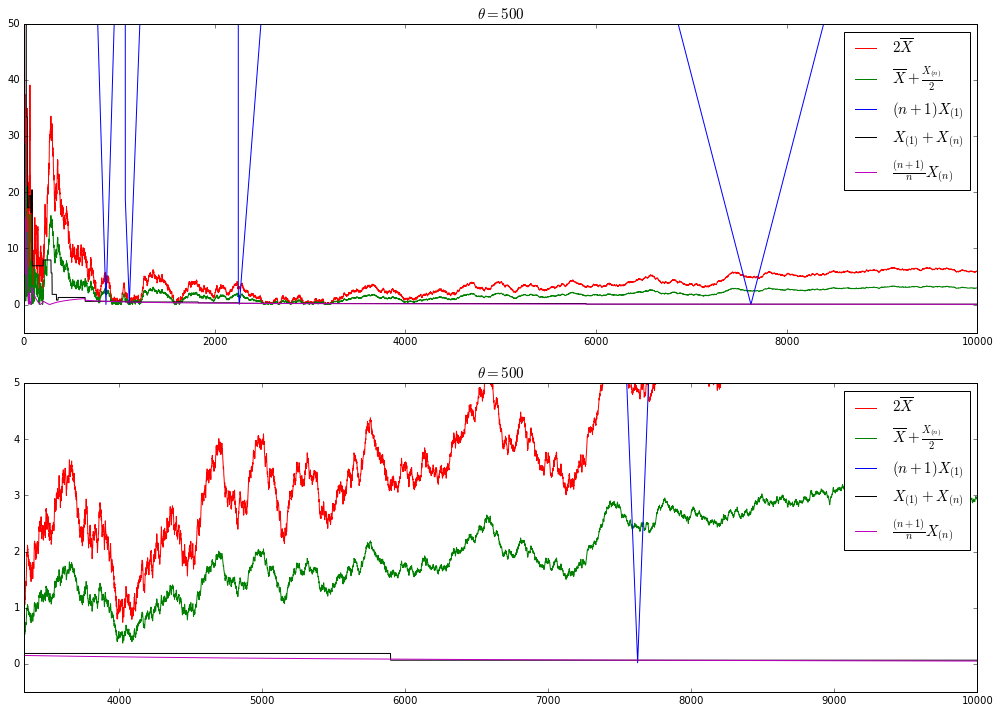

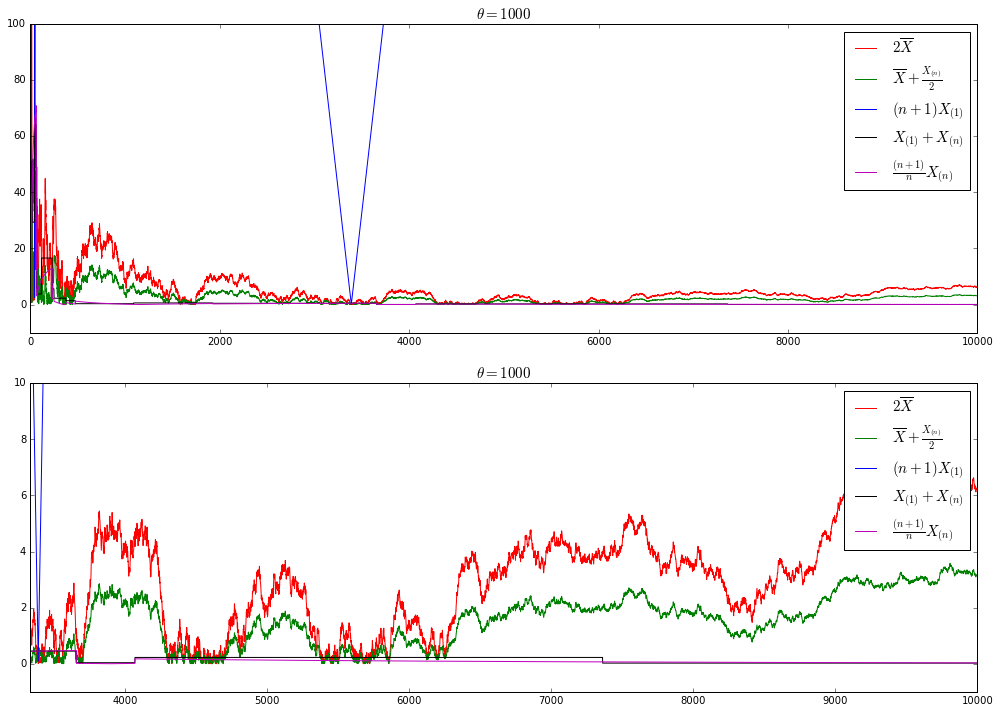

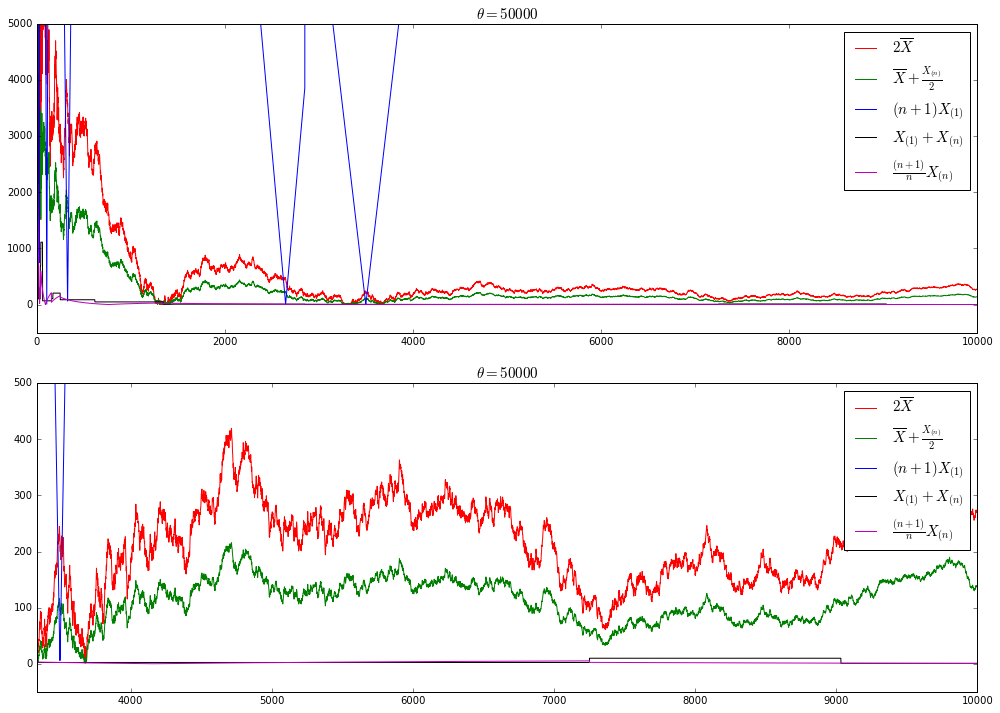

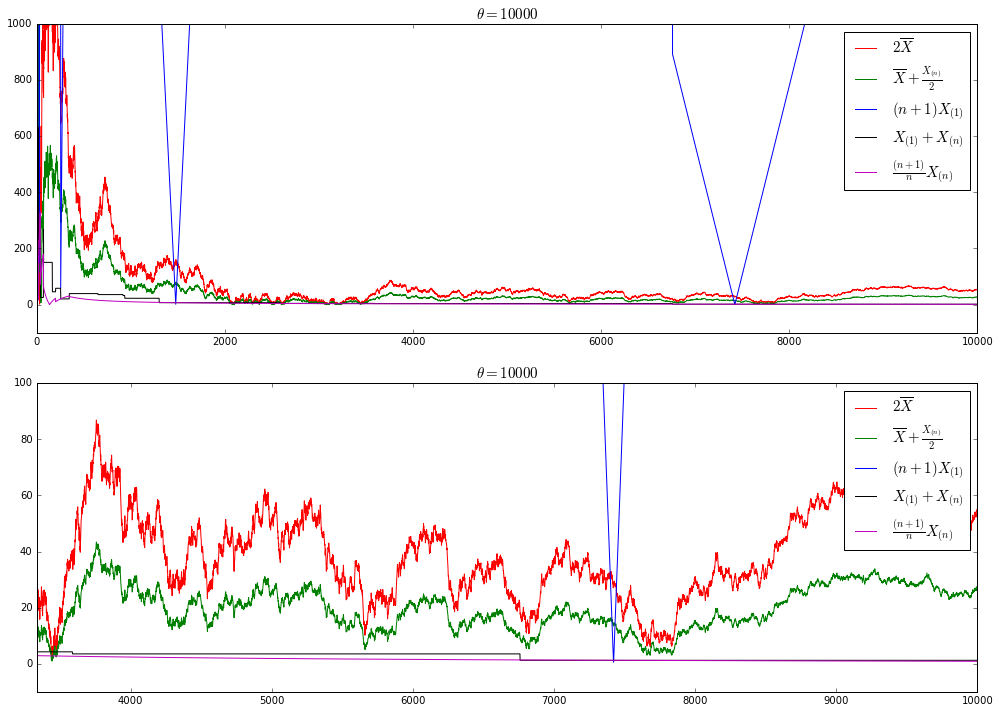

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def show_graph(xmin, xmax, ymin, ymax, parameter):
    plt.title("$\\theta = " + str(parameter) + "$", fontsize=15)
    graph0, = plt.plot(arr0, 'r', label='$2\\overline{X}$')
    graph1, = plt.plot(arr1, 'g', label='$\\overline{X} + \\frac{X_{(n)}}{2}$')
    graph2, = plt.plot(arr2, 'b', label='$(n+1)X_{(1)}$')
    graph3, = plt.plot(arr3, 'k', label='$X_{(1)} + X_{(n)}$')
    graph4, = plt.plot(arr4, 'm', label='$\\frac{(n+1)}{n}X_{(n)}$')
    plt.legend(handles=[graph0, graph1, graph2, graph3, graph4], fontsize=15)
    plt.axis([xmin, xmax, ymin, ymax])


n = 10000

# try different values of theta
for theta in [1, 10, 100, 500, 1000, 50000, 10000]:
    # generate samples from uniform distribution
    x = np.random.uniform(0, theta, n)

    arr0, arr1, arr2, arr3, arr4 = [], [], [], [], []
    x_1 = theta
    x_n = 0
    nsum = 0

    # parameter estimations
    for index in range(1, n):
        x_1 = min(x[index], x_1)
        x_n = max(x[index], x_n)
        nsum += x[index]
        arr0.append(abs(nsum * 2 / index - theta))
        arr1.append(abs(nsum / index + x_n / 2 - theta))
        arr2.append(abs((index + 1) * x_1 - theta))
        arr3.append(abs(x_1 + x_n - theta))
        arr4.append(abs((index + 1) / index * x_n - theta))

    # draw plots
    plt.figure(figsize=(14, 10))
    plt.subplot(211)
    show_graph(0, n, -theta / 100, theta * 0.1, theta)
    plt.subplot(212)
    show_graph(n / 3, n, -theta / 1000, theta / 100, theta)
    plt.tight_layout(1.08, 2)
    plt.show()